In [1]:
from google.colab import files
file = files.upload()

Saving wibu.png to wibu.png


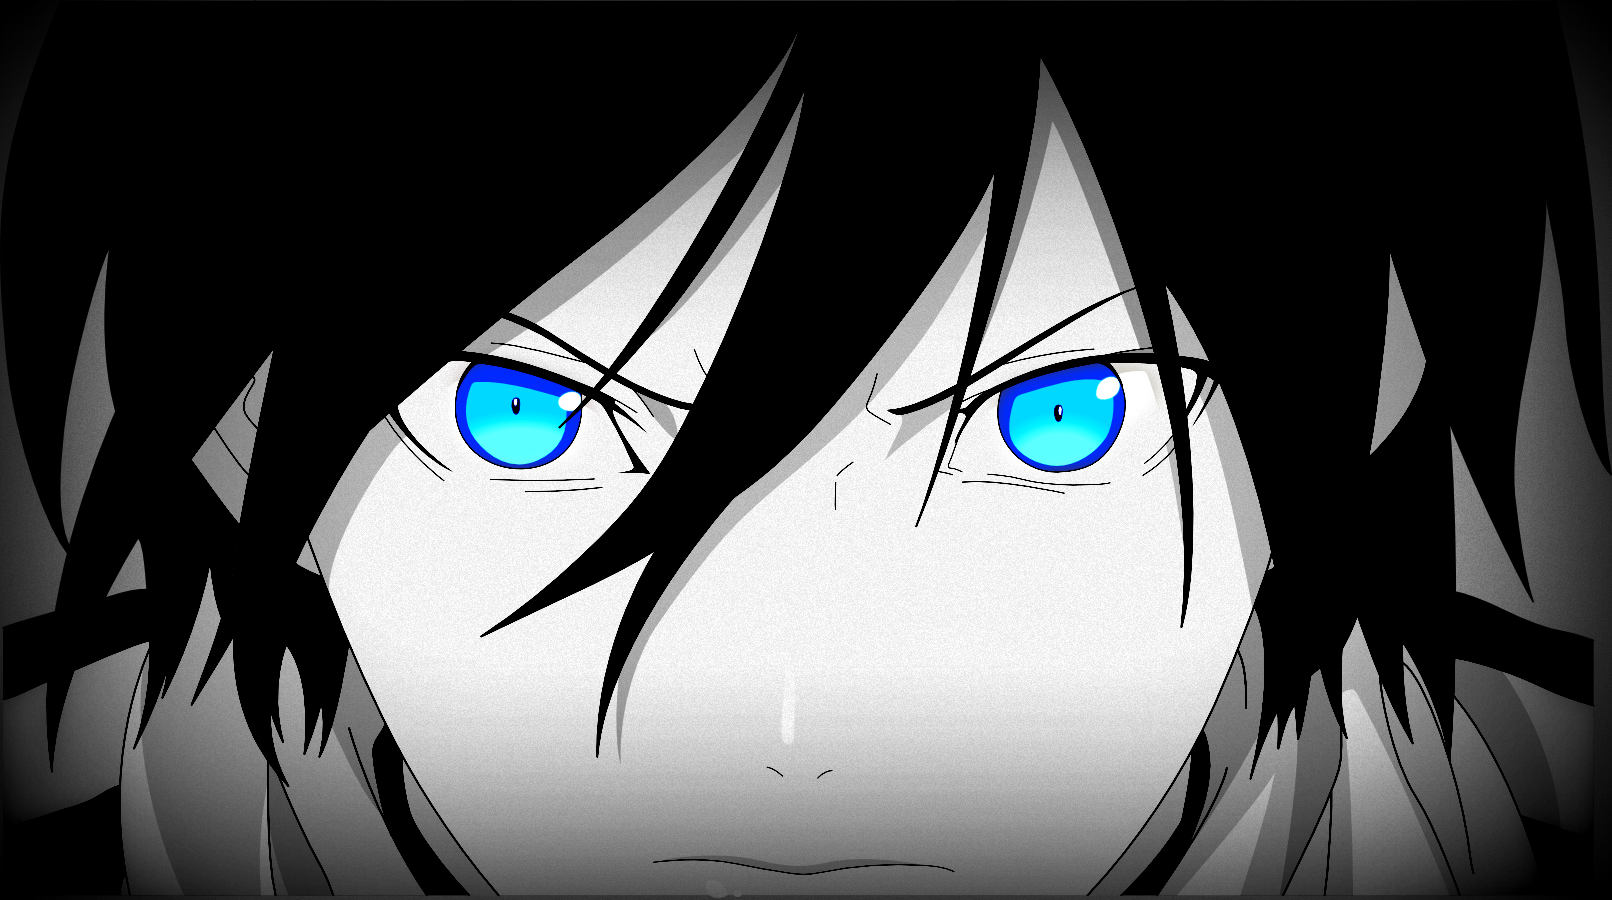

<class 'numpy.ndarray'>


In [3]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('wibu.png')
cv2_imshow(img)
print(type(img))

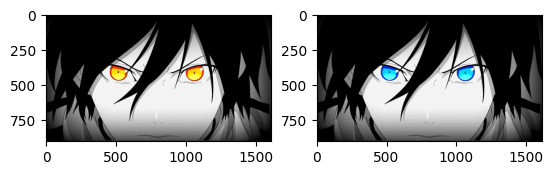

In [4]:
# memanggil fungsi plt dari matplotlib
from matplotlib import pyplot as plt

# membuat sebuah variabel kosong 'fig'
fig = plt.figure()
fig.add_subplot(121)
# subplot (jumlah baris, jumlah kolom, urutan)

# menampilkan gambar dengan fungsi plt
plt.imshow(img)

# plotting gambar
fig.add_subplot(122)
# subplot, formatnya: (jumlah baris, jumlah kolom, urutan)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show() #untuk menampilkan plot

In [5]:
print(img.shape) #menampilkan resolusi

(900, 1612, 3)


In [6]:
print(img.size) #menampilkan ukuran data pada media penyimpan

4352400


In [7]:
print(img.dtype) #image datatype (kedalaman bit)

uint8


In [8]:
b = img[...,0]
g = img[...,1]
r = img[...,2]

In [9]:
cv2_imshow(b);

In [10]:
cv2_imshow(g);

In [11]:
cv2_imshow(r);

In [12]:
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV);

In [13]:
h,s,v = cv2.split(hsv)

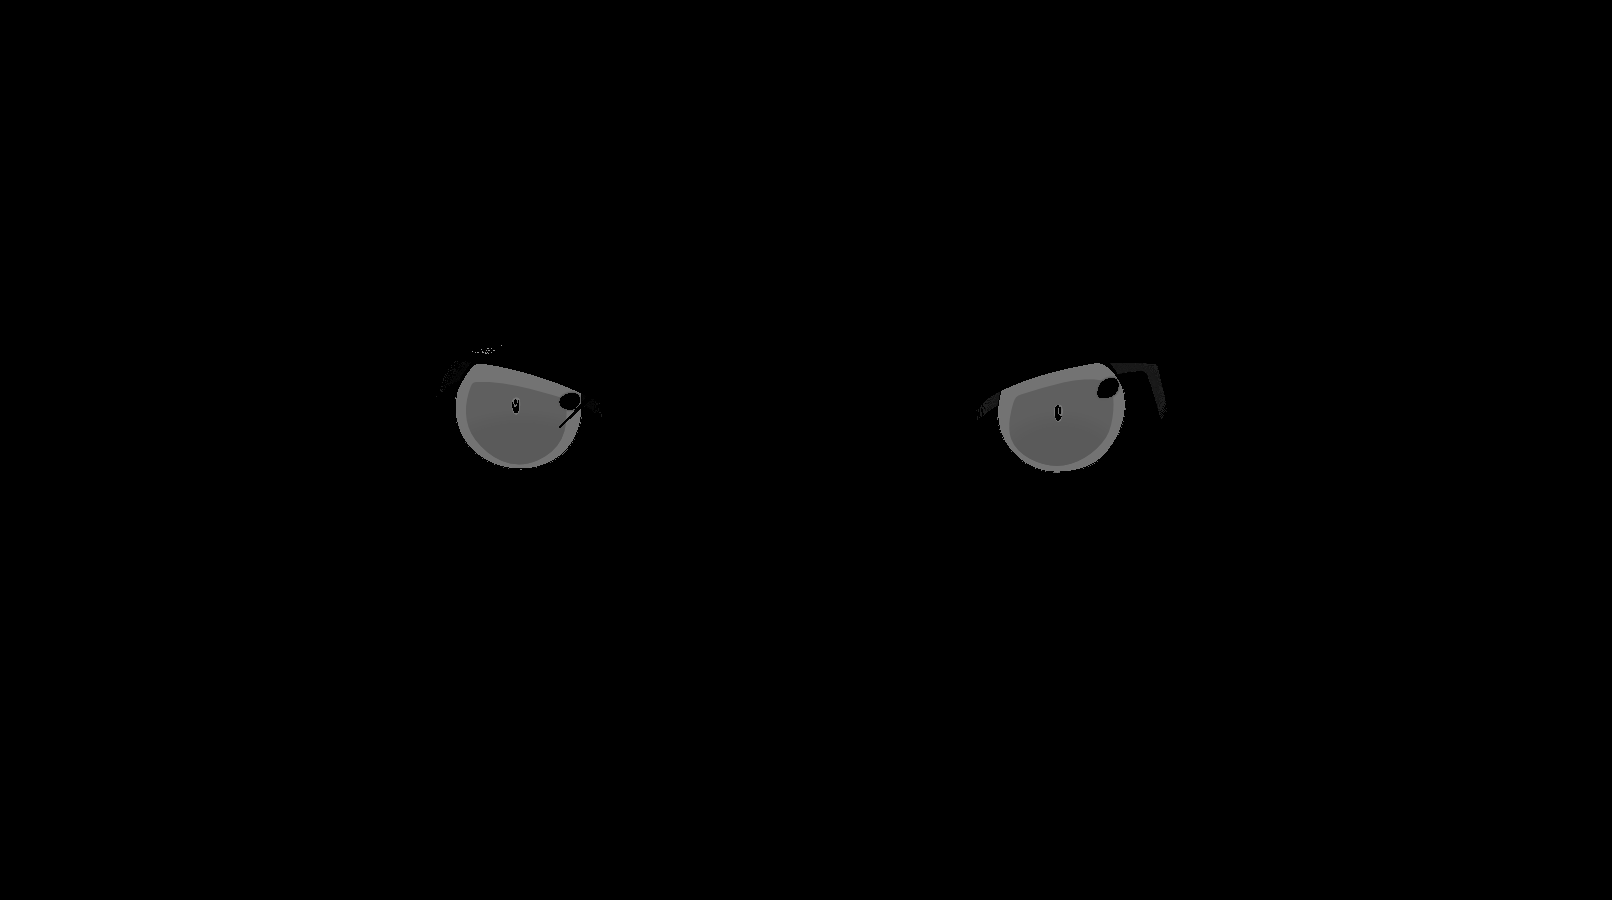

In [14]:
cv2_imshow(h)

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
color = ('b','g','r')
for i,col in enumerate(color):
  histr = cv2.calcHist([img], [i], None, [256], [0,256])
  plt.plot(histr, color = col)
  plt.xlim([0,256])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [16]:
# Perbaikan Kualitas Citra: CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
v_clahe = clahe.apply(v)

In [17]:
# Gabungkan kembali saluran Hue, Saturation, dan saluran yang telah diperbaiki (Value)
hsv_clahe = cv2.merge([h, s, v_clahe])

In [18]:
# Konversi kembali ke mode warna BGR
img_clahe = cv2.cvtColor(hsv_clahe, cv2.COLOR_HSV2BGR)

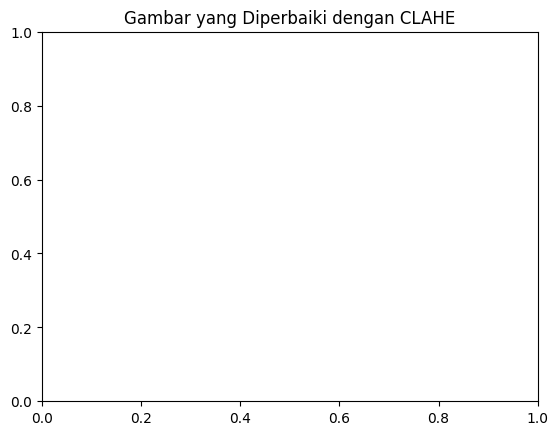

In [19]:
# Tampilkan gambar yang telah diperbaiki dengan CLAHE
cv2_imshow(img_clahe)
plt.title('Gambar yang Diperbaiki dengan CLAHE')
plt.show()